In [166]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


In [167]:
Dados = pd.read_csv('Air_Passengers.csv', sep = ',')
Dados.head(10)
#Convertendo e Analisando strings para o tipo data e hora.
Dados['Month'] = pd.to_datetime(Dados['Month'], infer_datetime_format=True) #Converte a String para datetime
Dados_conv = Dados.set_index(['Month'])
Dados_conv.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


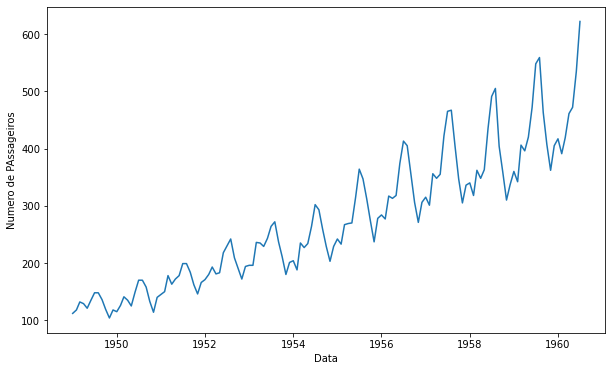

In [168]:
#Visualizando os dados de forma grafica!
plt.xlabel('Data') #eixo x
plt.ylabel('Numero de PAssageiros') #eixo y
plt.plot(Dados_conv) #serie de numeros de passageiros em função da Data

In [169]:
#Estátisicas de Rolamento!
rolmean = Dados_conv.rolling(window=12).mean()
rolstd  = Dados_conv.rolling(window=12).std()

print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-03-01   438.250000
1960-04-01   443.666667
1960-05-01   448.000000
1960-06-01   453.250000
1960-07-01   459.416667

[139 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-03-01    61.382741
1960-04-01    60.171472
1960-05-01    60.184565
1960-06-01    65.021849
1960-07-01    77.194510

[139 rows x 1 columns]


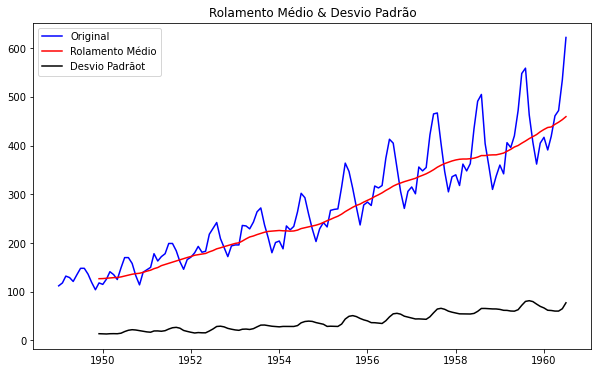

In [170]:
# Printando as Estatisiticas de Rolamento
original = plt.plot(Dados_conv, color='blue', label='Original')
media = plt.plot(rolmean, color='red', label='Rolamento Médio')
standart = plt.plot(rolstd, color='black', label='Desvio Padrãot')
plt.legend(loc='best')
plt.title('Rolamento Médio & Desvio Padrão')
plt.show(block=False)

In [171]:
#Test Dickey-Fuller
print('Resultados do Teste Dickey Fuller:')
dftest = adfuller(Dados_conv['#Passengers'], autolag="AIC")

dfoutput = pd.Series(dftest[0:4], index=['Teste Estatistico','p-value', '#LAG usado', 'Nº de observações usado'])
for key,value in dftest[4].items():

    dfoutput['Valor Critico (%s)' %key] = value
print(dfoutput)

Resultados do Teste Dickey Fuller:
Teste Estatistico            1.221233
p-value                      0.996129
#LAG usado                  14.000000
Nº de observações usado    124.000000
Valor Critico (1%)          -3.484220
Valor Critico (5%)          -2.885145
Valor Critico (10%)         -2.579359
dtype: float64


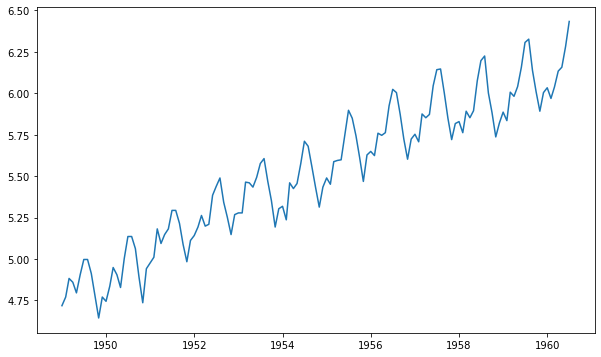

In [172]:
#estimando a tendencia
Dados_conv_logScale=np.log(Dados_conv)
plt.plot(Dados_conv_logScale)

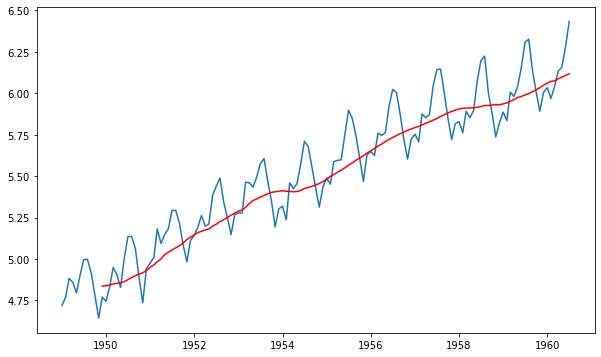

In [173]:
#TRansformando a Serie em Serie Estácionaria

mov_medio = Dados_conv_logScale.rolling(window=12).mean()
mov_padrao = Dados_conv_logScale.rolling(window=12).std()
plt.plot(Dados_conv_logScale)
plt.plot(mov_medio, color='red')

In [174]:
Dado_log_mov_medio = Dados_conv_logScale - mov_medio
Dado_log_mov_medio.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [175]:
#Removendo os NAN
Dado_log_mov_medio.dropna(inplace=True)
Dado_log_mov_medio.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [176]:
#criando Função teste_estacionario
def teste_estacionario (timeseries):
    #determinando as estatisticas de rolamento
    movmedio = timeseries.rolling(window=12).mean()
    movpadrao = timeseries.rolling(window=12).std()
    
    #plotando as estatisticas de rolamento
    orig = plt.plot(timeseries, color='blue', label='Original')
    media = plt.plot(movmedio, color='red', label='Rolamento medio')
    std = plt.plot(movpadrao, color='black', label='Rolamento padrão')
    plt.legend(loc='best')
    plt.title('Rolamento Médio & Desvio PAdrão')
    plt.show(block=False)
    
     #Perform Dickey–Fuller test:
    print('Resultados do Teste Dickey Fuller:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Teste Estatistico','p-value','#Lags usado','Numero de Obs usado'])
    for key,value in dftest[4].items():
        dfoutput['Valor Critico (%s)'%key] = value
    print(dfoutput)
    


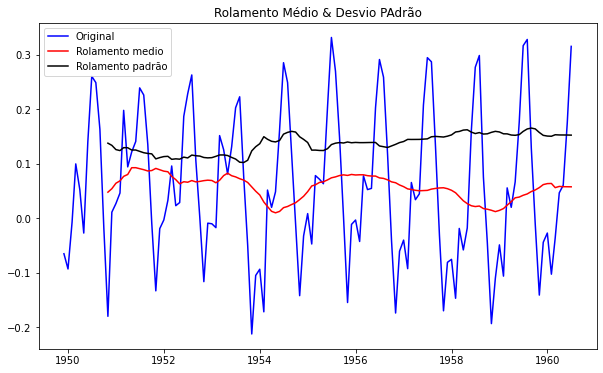

Resultados do Teste Dickey Fuller:
Teste Estatistico       -3.158932
p-value                  0.022488
#Lags usado             13.000000
Numero de Obs usado    114.000000
Valor Critico (1%)      -3.489058
Valor Critico (5%)      -2.887246
Valor Critico (10%)     -2.580481
dtype: float64


In [177]:
#imprimindo a função
teste_estacionario(Dado_log_mov_medio)

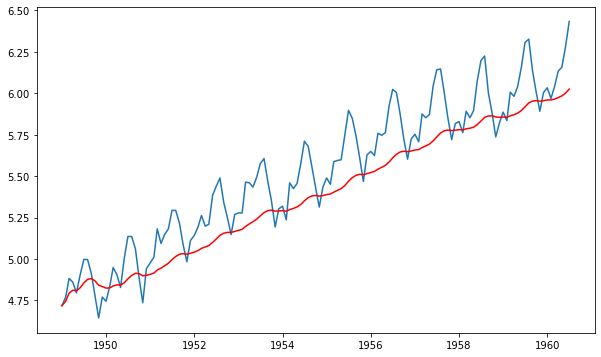

In [178]:
#plotando o com Decaimento exponencial
exp_decaimento_medio = Dados_conv_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(Dados_conv_logScale)
plt.plot(exp_decaimento_medio, color='red')

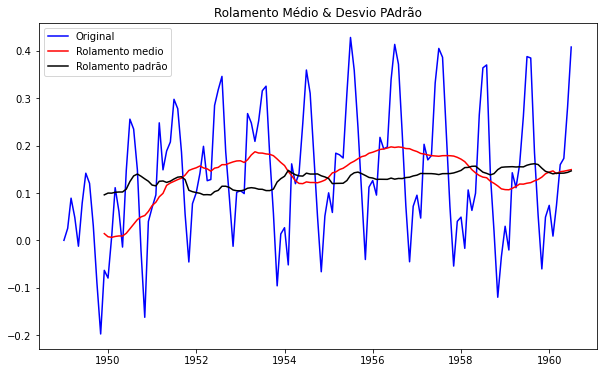

Resultados do Teste Dickey Fuller:
Teste Estatistico       -3.541470
p-value                  0.006984
#Lags usado             13.000000
Numero de Obs usado    125.000000
Valor Critico (1%)      -3.483779
Valor Critico (5%)      -2.884954
Valor Critico (10%)     -2.579257
dtype: float64


In [179]:
#calculando e plotando o rolamento medio e o rolamento padrão, utilizando a função "teste_estacionario"
Dados_logScale_exp_medio = Dados_conv_logScale - exp_decaimento_medio
teste_estacionario(Dados_logScale_exp_medio)

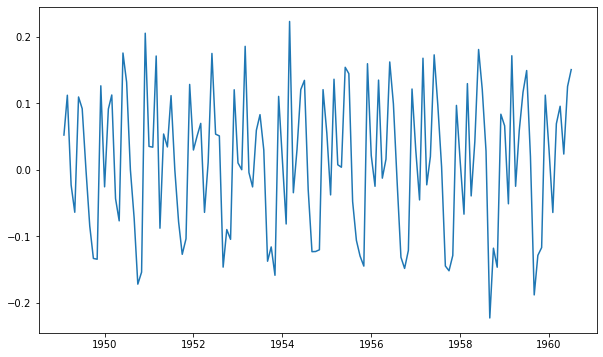

In [180]:
Dados_log_scale_diffshift = Dados_conv_logScale - Dados_conv_logScale.shift()
plt.plot(Dados_log_scale_diffshift)


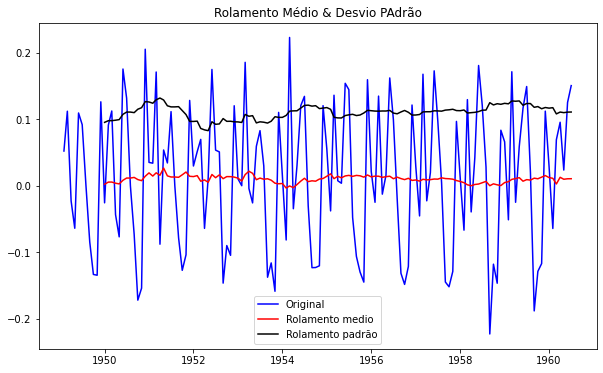

Resultados do Teste Dickey Fuller:
Teste Estatistico       -2.698629
p-value                  0.074276
#Lags usado             14.000000
Numero de Obs usado    123.000000
Valor Critico (1%)      -3.484667
Valor Critico (5%)      -2.885340
Valor Critico (10%)     -2.579463
dtype: float64


In [187]:
Dados_log_scale_diffshift.dropna(inplace=True)
teste_estacionario(Dados_log_scale_diffshift)


<ipython-input-198-16ab9b14068c>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)
<ipython-input-198-16ab9b14068c>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)


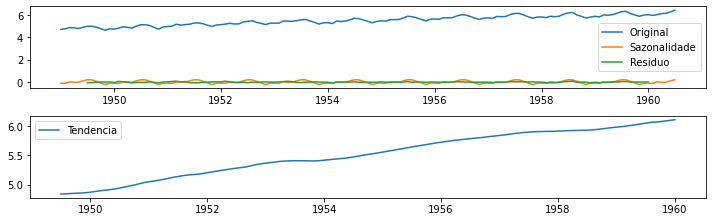

In [198]:
decomposicao = seasonal_decompose(Dados_conv_logScale)

tendencia = decomposicao.trend
sazional = decomposicao.seasonal
residuo = decomposicao.resid


plt.subplot(411)
plt.plot(Dados_conv_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(sazional, label='Sazonalidade')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residuo, label='Residuo')
plt.legend(loc='best')

plt.tight_layout()

#Provavelmente há casos em que um observação é tendencia ou sazonalidade. Assim, nesse caso, não há residual!
decomposicaologdados = residuo
#removemos os NA
decomposicaologdados.dropna(inplace=True)
#usamos a função Teste_estacionario
#teste_estacionario(decomposicaologdados)
